In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname=r"/root/anaconda2/e nvs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/msyh.ttf")

import numpy as np
import seaborn as sns

import math

#print 1

#import sys 
#reload(sys) 
#sys.setdefaultencoding('GB2312') 

In [2]:
data1 = pd.read_csv("737_Apr-Jun.csv", encoding = "GB18030")
#data1.loc[data1[u"Fail"]<>data1[u"Fail"],"failure"] = 0
#data1.loc[data1[u"Fail"]==data1[u"Fail"],"failure"] = -1

data1.boxplot()




In [4]:
data1 = data1[data1[u"环境温度(℃)"]<100]
data1 = data1[data1[u"左边CONT CABIN DUCT"]<100]
data1 = data1[data1[u"右边L PACK"]<100]

In [5]:
data1[u"执行反吹左侧"].fillna(0,inplace=True)
data1[u"执行反吹右侧"].fillna(0,inplace=True)

In [6]:
data1[u"执行反吹左侧"].value_counts()

0.0    16062
1.0      263
Name: 执行反吹左侧, dtype: int64

In [7]:
data1[u"执行反吹右侧"].value_counts()

0.0    16170
1.0      155
Name: 执行反吹右侧, dtype: int64

In [8]:
data1.describe()

,环境温度(℃),左边CONT CABIN DUCT,左边L PACK,右边FWD DUCT,右边AFT DUCT,右边L PACK,执行反吹左侧,执行反吹右侧,左温差,右温差
count,16325.000000,16325.000000,16325.000000,16325.000000,16325.000000,16325.000000,16325.000000,16325.000000,16325.000000,16325.000000
mean,21.921225,4.529556,27.480551,4.643185,4.523247,26.791853,0.016110,0.009495,5.559326,4.870628
std,5.614574,2.023826,5.385148,1.865329,1.735627,5.172536,0.125903,0.096980,4.750771,4.460359
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-31.000000,-40.000000
25%,18.000000,4.000000,24.000000,4.000000,4.000000,23.000000,0.000000,0.000000,3.000000,3.000000
50%,22.000000,4.000000,28.000000,4.000000,4.000000,26.000000,0.000000,0.000000,6.000000,5.000000
75%,26.000000,6.000000,31.000000,6.000000,6.000000,30.000000,0.000000,0.000000,8.000000,7.000000
max,42.000000,37.000000,84.000000,37.000000,32.000000,56.000000,1.000000,1.000000,59.000000,32.000000


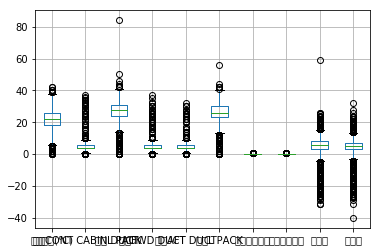

In [9]:
data1.boxplot()

In [10]:
#col = [u"环境温度(℃)", u"左温差",u"右温差",u"左边CONT CABIN DUCT",u"左边L PACK",u"右边FWD DUCT",u"右边AFT DUCT",u"右边L PACK"]
col = [u"左温差",u"右温差",u"左边CONT CABIN DUCT",u"左边L PACK",u"右边FWD DUCT",u"右边AFT DUCT",u"右边L PACK"]

In [11]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [12]:
df_train = data1[col]

In [13]:
df_train.shape

(16325, 7)

In [14]:
X = StandardScaler().fit_transform(df_train)

/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Part2

In [15]:
%matplotlib inline

In [16]:
#!conda install -c conda-forge imbalanced-learn

In [17]:
from abc import ABCMeta

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

#from imblearn.over_sampling import SMOTE
#import imblearn

## 执行反吹左侧

In [19]:
h = .02  # step size in the mesh
maxiteration = 50

names = ["Nearest Neighbors", 
         "LogisticRegression",
         "SGD",
         #"Linear SVM", 
         "RBF SVM", 
         #"Gaussian Process",
         "Decision Tree", 
         #"Random Forest", 
         #"Neural Net", 
         "AdaBoost",
         "Naive Bayes",
         "XGBoost",
         "GradientBoost",
         "QDA"]

classifiers = [ 
    KNeighborsClassifier(2),
    LogisticRegression(),
    SGDClassifier(penalty='l1', alpha=0.001, loss='squared_hinge'),
    #SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(min_samples_split=90, max_depth=9),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    #MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100, learning_rate=1),
    GaussianNB(),
    xgb.XGBClassifier(random_state=1,learning_rate=0.01, subsample= 0.8, colsample_bytree= 1.0, max_depth= 5, gamma=1.5, 
                      min_child_weight= 1),
    GradientBoostingClassifier(learning_rate=0.01,random_state=1, loss='deviance', min_samples_leaf= 0.1, 
                               n_estimators= 10, min_samples_split= 0.1, max_features='log2', max_depth= 3),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


datasets = [[data1[col], data1[u"执行反吹左侧"]]]

figure = plt.figure(figsize=(27, 5))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    i += 1

    cv_scores = {"name": [], "test_score": []}
    order = []
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):

        print(name)
        order.append(name)
        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        for j in range(maxiteration):
            print(j)
            
            X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.2)
            
            clf.fit(X_train, y_train)
            #score = clf.score(X_test, y_test)
            
            #X_test = StandardScaler().fit_transform(X_test)
            y_pred = clf.predict(X_test)
            score = f1_score(y_test, y_pred, average='macro')
            print(score)
            print(classification_report(y_test, y_pred))
            print(confusion_matrix(y_test, y_pred))
            cv_scores["name"].append(name)
            cv_scores["test_score"].append(score)
            
        i += 1

/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Nearest Neighbors
0
0.5912949995213796
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3216
         1.0       0.43      0.12      0.19        49

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.71      0.56      0.59      3265
weighted avg       0.98      0.98      0.98      3265

[[3208    8]
 [  43    6]]
1
0.5752673524437867
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3212
         1.0       0.50      0.09      0.16        53

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.74      0.55      0.58      3265
weighted avg       0.98      0.98      0.98      3265

[[3207    5]
 [  48    5]]
2
0.5786879322803758
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3204
         1.0       0.55      0.10      0.17        61

   micro avg       0.98      0.98      0.98    

0.5987629034900869
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3211
         1.0       0.50      0.13      0.21        54

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.74      0.56      0.60      3265
weighted avg       0.98      0.98      0.98      3265

[[3204    7]
 [  47    7]]
24
0.634686287882017
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3217
         1.0       0.80      0.17      0.28        48

   micro avg       0.99      0.99      0.99      3265
   macro avg       0.89      0.58      0.63      3265
weighted avg       0.98      0.99      0.98      3265

[[3215    2]
 [  40    8]]
25
0.5702171488218816
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3209
         1.0       0.45      0.09      0.15        56

   micro avg       0.98      0.98      0.98      3265
   macro avg

0.6020965659695326
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3209
         1.0       0.42      0.14      0.21        56

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.70      0.57      0.60      3265
weighted avg       0.98      0.98      0.98      3265

[[3198   11]
 [  48    8]]
47
0.5579431311797405
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3200
         1.0       0.36      0.08      0.13        65

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.67      0.54      0.56      3265
weighted avg       0.97      0.98      0.97      3265

[[3191    9]
 [  60    5]]
48
0.5840888332371172
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3218
         1.0       0.50      0.11      0.18        47

   micro avg       0.99      0.99      0.99      3265
   macro av

/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4958307597282273
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3220
         1.0       0.00      0.00      0.00        45

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.97      0.98      0.98      3265

[[3211    9]
 [  45    0]]
1
0.5316982214572575
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3220
         1.0       0.18      0.04      0.07        45

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.58      0.52      0.53      3265
weighted avg       0.98      0.98      0.98      3265

[[3211    9]
 [  43    2]]
2
0.49466026930815665
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3203
         1.0       0.00      0.00      0.00        62

   micro avg       0.98      0.98      0.98      3265
   macro avg

0.5331766293779883
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3220
         1.0       0.22      0.04      0.07        45

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.60      0.52      0.53      3265
weighted avg       0.98      0.98      0.98      3265

[[3213    7]
 [  43    2]]
26
0.5102010201020103
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3206
         1.0       0.14      0.02      0.03        59

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.56      0.51      0.51      3265
weighted avg       0.97      0.98      0.97      3265

[[3200    6]
 [  58    1]]
27
0.5149309166542861
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3221
         1.0       0.11      0.02      0.04        44

   micro avg       0.98      0.98      0.98      3265
   macro av

/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


[[3175   34]
 [  35   21]]
1
0.6299768158740027
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3215
         1.0       0.28      0.26      0.27        50

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.64      0.62      0.63      3265
weighted avg       0.98      0.98      0.98      3265

[[3182   33]
 [  37   13]]
2
0.6476358292012425
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3216
         1.0       0.40      0.24      0.30        49

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.69      0.62      0.65      3265
weighted avg       0.98      0.98      0.98      3265

[[3198   18]
 [  37   12]]
3
0.5826537856772145
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3207
         1.0       0.21      0.16      0.18        58

   micro avg       0.97      0.97     

[[3181   27]
 [  39   18]]
30
0.6036161626310325
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3222
         1.0       0.26      0.19      0.22        43

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.62      0.59      0.60      3265
weighted avg       0.98      0.98      0.98      3265

[[3199   23]
 [  35    8]]
31
0.7041064854148966
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3220
         1.0       0.35      0.51      0.42        45

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.67      0.75      0.70      3265
weighted avg       0.98      0.98      0.98      3265

[[3178   42]
 [  22   23]]
32
0.6467000185288123
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3213
         1.0       0.30      0.31      0.30        52

   micro avg       0.98      0.98  

0.5518495642028687
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3217
         1.0       0.50      0.06      0.11        48

   micro avg       0.99      0.99      0.99      3265
   macro avg       0.74      0.53      0.55      3265
weighted avg       0.98      0.99      0.98      3265

[[3214    3]
 [  45    3]]
3
0.5486921381934675
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3214
         1.0       0.50      0.06      0.11        51

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.74      0.53      0.55      3265
weighted avg       0.98      0.98      0.98      3265

[[3211    3]
 [  48    3]]
4
0.556604938271605
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3221
         1.0       0.50      0.07      0.12        44

   micro avg       0.99      0.99      0.99      3265
   macro avg  

0.5874341874341874
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3221
         1.0       0.45      0.11      0.18        44

   micro avg       0.99      0.99      0.99      3265
   macro avg       0.72      0.56      0.59      3265
weighted avg       0.98      0.99      0.98      3265

[[3215    6]
 [  39    5]]
25
0.5486921381934676
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3213
         1.0       0.60      0.06      0.11        52

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.79      0.53      0.55      3265
weighted avg       0.98      0.98      0.98      3265

[[3211    2]
 [  49    3]]
26
0.556604938271605
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3220
         1.0       0.60      0.07      0.12        45

   micro avg       0.99      0.99      0.99      3265
   macro avg

0.5705224990277491
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3216
         1.0       0.80      0.08      0.15        49

   micro avg       0.99      0.99      0.99      3265
   macro avg       0.89      0.54      0.57      3265
weighted avg       0.98      0.99      0.98      3265

[[3215    1]
 [  45    4]]
47
0.6194855282807669
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3220
         1.0       0.58      0.16      0.25        45

   micro avg       0.99      0.99      0.99      3265
   macro avg       0.79      0.58      0.62      3265
weighted avg       0.98      0.99      0.98      3265

[[3215    5]
 [  38    7]]
48
0.529005667181865
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3214
         1.0       0.22      0.04      0.07        51

   micro avg       0.98      0.98      0.98      3265
   macro avg

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3218
         1.0       0.34      0.23      0.28        47

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.67      0.61      0.63      3265
weighted avg       0.98      0.98      0.98      3265

[[3197   21]
 [  36   11]]
23
0.6912893080077996
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3223
         1.0       0.38      0.40      0.39        42

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.69      0.70      0.69      3265
weighted avg       0.98      0.98      0.98      3265

[[3195   28]
 [  25   17]]
24
0.622009344052242
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3211
         1.0       0.40      0.19      0.25        54

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.69      0.

0.6532923470703511
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3202
         1.0       0.36      0.29      0.32        63

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.67      0.64      0.65      3265
weighted avg       0.97      0.98      0.98      3265

[[3170   32]
 [  45   18]]
47
0.6006148777583873
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3218
         1.0       0.28      0.17      0.21        47

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.63      0.58      0.60      3265
weighted avg       0.98      0.98      0.98      3265

[[3197   21]
 [  39    8]]
48
0.664409148927025
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3211
         1.0       0.48      0.26      0.34        54

   micro avg       0.98      0.98      0.98      3265
   macro avg

0.6476358292012425
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3213
         1.0       0.44      0.23      0.30        52

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.72      0.61      0.65      3265
weighted avg       0.98      0.98      0.98      3265

[[3198   15]
 [  40   12]]
19
0.6888157562777868
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3220
         1.0       0.42      0.36      0.39        45

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.71      0.67      0.69      3265
weighted avg       0.98      0.98      0.98      3265

[[3198   22]
 [  29   16]]
20
0.6525680812352049
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3216
         1.0       0.35      0.29      0.31        49

   micro avg       0.98      0.98      0.98      3265
   macro av

0.6703611051905365
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3208
         1.0       0.42      0.30      0.35        57

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.71      0.65      0.67      3265
weighted avg       0.98      0.98      0.98      3265

[[3185   23]
 [  40   17]]
41
0.656229600148554
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3208
         1.0       0.54      0.23      0.32        57

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.76      0.61      0.66      3265
weighted avg       0.98      0.98      0.98      3265

[[3197   11]
 [  44   13]]
42
0.6421625158467263
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3206
         1.0       0.39      0.24      0.29        59

   micro avg       0.98      0.98      0.98      3265
   macro avg

[[3148   68]
 [  25   24]]
24
0.6028783251747728
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      3215
         1.0       0.16      0.38      0.23        50

   micro avg       0.96      0.96      0.96      3265
   macro avg       0.58      0.67      0.60      3265
weighted avg       0.98      0.96      0.97      3265

[[3116   99]
 [  31   19]]
25
0.624598463193049
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      3209
         1.0       0.20      0.43      0.27        56

   micro avg       0.96      0.96      0.96      3265
   macro avg       0.59      0.70      0.62      3265
weighted avg       0.98      0.96      0.97      3265

[[3111   98]
 [  32   24]]
26
0.6138776443948135
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      3220
         1.0       0.17      0.44      0.25        45

   micro avg       0.96      0.96   

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      3201
         1.0       0.24      0.48      0.32        64

   micro avg       0.96      0.96      0.96      3265
   macro avg       0.62      0.73      0.65      3265
weighted avg       0.97      0.96      0.97      3265

[[3105   96]
 [  33   31]]
49
0.5638740850827066
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      3222
         1.0       0.10      0.26      0.15        43

   micro avg       0.96      0.96      0.96      3265
   macro avg       0.55      0.61      0.56      3265
weighted avg       0.98      0.96      0.97      3265

[[3127   95]
 [  32   11]]
XGBoost
0
0.5432120582886008
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3207
         1.0       0.60      0.05      0.10        58

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.79

0.5614773104516116
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3214
         1.0       0.40      0.08      0.13        51

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.69      0.54      0.56      3265
weighted avg       0.98      0.98      0.98      3265

[[3208    6]
 [  47    4]]
21
0.5581696566656356
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3207
         1.0       0.67      0.07      0.12        58

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.83      0.53      0.56      3265
weighted avg       0.98      0.98      0.98      3265

[[3205    2]
 [  54    4]]
22
0.6020234032179425
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3209
         1.0       0.32      0.16      0.21        56

   micro avg       0.98      0.98      0.98      3265
   macro av

0.5372217824675254
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3213
         1.0       0.16      0.06      0.08        52

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.57      0.53      0.54      3265
weighted avg       0.97      0.98      0.98      3265

[[3197   16]
 [  49    3]]
43
0.5987629034900868
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3218
         1.0       0.33      0.15      0.21        47

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.66      0.57      0.60      3265
weighted avg       0.98      0.98      0.98      3265

[[3204   14]
 [  40    7]]
44
0.5651027236690678
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3217
         1.0       0.40      0.08      0.14        48

   micro avg       0.98      0.98      0.98      3265
   macro av

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3209
         1.0       0.00      0.00      0.00        56

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.97      0.98      0.97      3265

[[3209    0]
 [  56    0]]
4
0.4955970956279932
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3208
         1.0       0.00      0.00      0.00        57

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.97      0.98      0.97      3265

[[3208    0]
 [  57    0]]
5
0.4958307597282273
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3211
         1.0       0.00      0.00      0.00        54

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.49      0.5

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

[[3206    0]
 [  59    0]]
8
0.49551915945611863
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3207
         1.0       0.00      0.00      0.00        58

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.96      0.98      0.97      3265

[[3207    0]
 [  58    0]]
9
0.4958307597282273
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3211
         1.0       0.00      0.00      0.00        54

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.97      0.98      0.98      3265

[[3211    0]
 [  54    0]]
10
0.4955970956279932
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3208
         1.0       0.00      0.00      0.00        57

   micro avg       0.98      0.98   

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

0.4963751349683788
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3218
         1.0       0.00      0.00      0.00        47

   micro avg       0.99      0.99      0.99      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.97      0.99      0.98      3265

[[3218    0]
 [  47    0]]
13
0.49528520636883594
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3204
         1.0       0.00      0.00      0.00        61

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.96      0.98      0.97      3265

[[3204    0]
 [  61    0]]
14
0.4966080789392538
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3221
         1.0       0.00      0.00      0.00        44

   micro avg       0.99      0.99      0.99      3265
   macro a

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

0.4951291170558218
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3202
         1.0       0.00      0.00      0.00        63

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.96      0.98      0.97      3265

[[3202    0]
 [  63    0]]
17
0.4956750077232005
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3209
         1.0       0.00      0.00      0.00        56

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.97      0.98      0.97      3265

[[3209    0]
 [  56    0]]
18
0.4957528957528958
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3210
         1.0       0.00      0.00      0.00        55

   micro avg       0.98      0.98      0.98      3265
   macro av

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3217
         1.0       0.00      0.00      0.00        48

   micro avg       0.99      0.99      0.99      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.97      0.99      0.98      3265

[[3217    0]
 [  48    0]]
21
0.49590859966033657
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3212
         1.0       0.00      0.00      0.00        53

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.97      0.98      0.98      3265

[[3212    0]
 [  53    0]]
22
0.4962974390620179
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3217
         1.0       0.00      0.00      0.00        48

   micro avg       0.99      0.99      0.99      3265
   macro avg       0.49      

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

[[3203    0]
 [  62    0]]
29
0.4966856790504085
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3222
         1.0       0.00      0.00      0.00        43

   micro avg       0.99      0.99      0.99      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.97      0.99      0.98      3265

[[3222    0]
 [  43    0]]
30
0.4956750077232005
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3209
         1.0       0.00      0.00      0.00        56

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.97      0.98      0.97      3265

[[3209    0]
 [  56    0]]
31
0.4957528957528958
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3210
         1.0       0.00      0.00      0.00        55

   micro avg       0.98      0.98  

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

0.49505103618929786
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3201
         1.0       0.00      0.00      0.00        64

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.96      0.98      0.97      3265

[[3201    0]
 [  64    0]]
34
0.496219719179139
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3216
         1.0       0.00      0.00      0.00        49

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.97      0.98      0.98      3265

[[3216    0]
 [  49    0]]
35
0.49520717377860235
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3203
         1.0       0.00      0.00      0.00        62

   micro avg       0.98      0.98      0.98      3265
   macro a

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3208
         1.0       0.00      0.00      0.00        57

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.97      0.98      0.97      3265

[[3208    0]
 [  57    0]]
38
0.4963751349683788
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3218
         1.0       0.00      0.00      0.00        47

   micro avg       0.99      0.99      0.99      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.97      0.99      0.98      3265

[[3218    0]
 [  47    0]]
39
0.4959864155603581
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3213
         1.0       0.00      0.00      0.00        52

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.49      0

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

0.4970733210104744
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3227
         1.0       0.00      0.00      0.00        38

   micro avg       0.99      0.99      0.99      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.98      0.99      0.98      3265

[[3227    0]
 [  38    0]]
47
0.49645280690931526
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3219
         1.0       0.00      0.00      0.00        46

   micro avg       0.99      0.99      0.99      3265
   macro avg       0.49      0.50      0.50      3265
weighted avg       0.97      0.99      0.98      3265

[[3219    0]
 [  46    0]]
48
0.49645280690931526
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3219
         1.0       0.00      0.00      0.00        46

   micro avg       0.99      0.99      0.99      3265
   macro 

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

0.7072934949909541
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      3206
         1.0       0.36      0.53      0.43        59

   micro avg       0.97      0.97      0.97      3265
   macro avg       0.68      0.75      0.71      3265
weighted avg       0.98      0.97      0.98      3265

[[3151   55]
 [  28   31]]
3
0.5532503830115587
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3210
         1.0       0.29      0.07      0.12        55

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.64      0.53      0.55      3265
weighted avg       0.97      0.98      0.98      3265

[[3200   10]
 [  51    4]]
4
0.510512225593432
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3215
         1.0       0.07      0.02      0.03        50

   micro avg       0.98      0.98      0.98      3265
   macro avg  

/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.

[[3146   70]
 [  26   23]]
14
0.6760541331898718
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      3204
         1.0       0.32      0.43      0.37        61

   micro avg       0.97      0.97      0.97      3265
   macro avg       0.65      0.70      0.68      3265
weighted avg       0.98      0.97      0.97      3265

[[3149   55]
 [  35   26]]
15
0.6471553341782349
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3207
         1.0       0.32      0.29      0.31        58

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.65      0.64      0.65      3265
weighted avg       0.98      0.98      0.98      3265

[[3171   36]
 [  41   17]]
16
0.5317635658914729
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3206
         1.0       0.14      0.05      0.08        59

   micro avg       0.98      0.98  

/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3210
         1.0       0.10      0.05      0.07        55

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.54      0.52      0.53      3265
weighted avg       0.97      0.98      0.97      3265

[[3183   27]
 [  52    3]]
25
0.5937258910846548
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3214
         1.0       0.27      0.16      0.20        51

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.63      0.58      0.59      3265
weighted avg       0.98      0.98      0.98      3265

[[3192   22]
 [  43    8]]
26
0.6708465165332838
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      3209
         1.0       0.27      0.52      0.36        56

   micro avg       0.97      0.97      0.97      3265
   macro avg       0.63      0

/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.

[[3148   64]
 [  37   16]]
36
0.6485509447394813
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      3215
         1.0       0.24      0.46      0.31        50

   micro avg       0.97      0.97      0.97      3265
   macro avg       0.61      0.72      0.65      3265
weighted avg       0.98      0.97      0.97      3265

[[3141   74]
 [  27   23]]
37
0.622009344052242
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3210
         1.0       0.42      0.18      0.25        55

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.70      0.59      0.62      3265
weighted avg       0.98      0.98      0.98      3265

[[3196   14]
 [  45   10]]
38
0.6534276868642194
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3224
         1.0       0.38      0.27      0.31        41

   micro avg       0.99      0.99   

/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.

0.6155959342255013
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3206
         1.0       0.42      0.17      0.24        59

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.70      0.58      0.62      3265
weighted avg       0.97      0.98      0.98      3265

[[3192   14]
 [  49   10]]
48
0.6778329430132709
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3206
         1.0       0.35      0.39      0.37        59

   micro avg       0.98      0.98      0.98      3265
   macro avg       0.67      0.69      0.68      3265
weighted avg       0.98      0.98      0.98      3265

[[3163   43]
 [  36   23]]
49
0.5968396319607124
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3208
         1.0       0.29      0.16      0.20        57

   micro avg       0.98      0.98      0.98      3265
   macro av

/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


<Figure size 1944x360 with 0 Axes>

In [122]:
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=1000)
clf = GridSearchCV(model, param_grid=params, cv=3, n_jobs=-1,scoring='f1')

clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.2515544472980943
{'penalty': 'none', 'alpha': 0.001, 'loss': 'squared_hinge'}


In [123]:
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree, parameters, cv=3, n_jobs=-1, scoring='f1')

clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.3569388486426744
{'min_samples_split': 10, 'max_depth': 17}


In [124]:
parameters = {
 'n_estimators': [16, 32, 50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 }
clf_ada = AdaBoostClassifier()
clf=GridSearchCV(clf_ada, parameters, cv=3, n_jobs=-1, scoring='f1')

y_train = y_train.rename("ResultRight")

clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.26672539906511433
{'n_estimators': 50, 'learning_rate': 1}


In [111]:
parameters = {
    "loss":["deviance"],
    #"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    #"criterion": ["friedman_mse",  "mae"],
    #"subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

clf_gbc = GradientBoostingClassifier()
clf=GridSearchCV(clf_gbc, parameters, cv=3, n_jobs=-1, scoring='f1',verbose=3)

clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 1480 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 2184 tasks      | elapsed:   14.1s


0.0
{'loss': 'deviance', 'min_samples_leaf': 0.1, 'n_estimators': 10, 'min_samples_split': 0.1, 'max_features': 'log2', 'max_depth': 3}


[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:   15.9s finished


In [125]:
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
clf_xgb = xgb.XGBClassifier()
clf=GridSearchCV(clf_xgb, parameters, cv=3, n_jobs=-1, scoring='f1',verbose=3)

clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 1112 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:   34.9s finished


0.2763768139868101
{'subsample': 0.6, 'colsample_bytree': 1.0, 'max_depth': 5, 'gamma': 1, 'min_child_weight': 1}


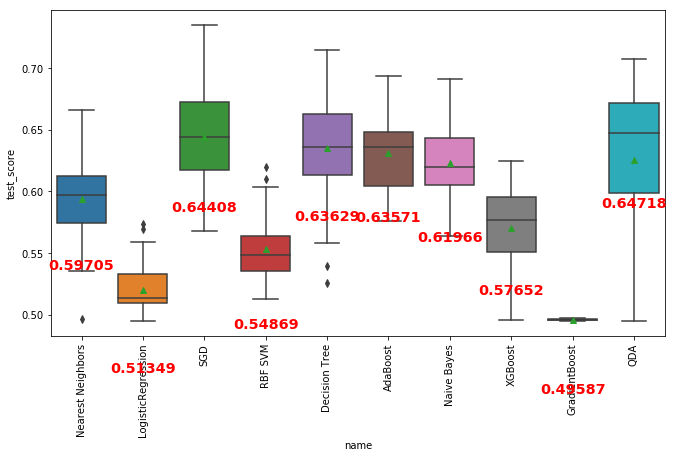

In [20]:
df = pd.DataFrame.from_dict(cv_scores)
_, ax = plt.subplots(figsize=(11, 6))
ax1 = sns.boxplot(x="name", y="test_score", data=df, order=order,ax=ax, showmeans=True)
_, xtext = plt.xticks()
for t in xtext:
    t.set_rotation("vertical")
    
medians = df.groupby(['name'],sort=False)['test_score'].median().values
median_labels = [str(np.round(s, 5)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax1.text(pos[tick], medians[tick]-0.06, median_labels[tick], 
            horizontalalignment='center', size='x-large', color='red', weight='semibold')

In [43]:
import statistics as sta
# Multi Voting Ensemble
model1 = SGDClassifier(loss='modified_huber',penalty='none', alpha=0.01)
model2 = DecisionTreeClassifier(max_depth=5, min_samples_split=70)
model3 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model4 = GaussianNB()
model5 = QuadraticDiscriminantAnalysis()
model6 = xgb.XGBClassifier(random_state=1,learning_rate=0.01, subsample= 0.8, 
                  colsample_bytree= 1.0, max_depth= 3, gamma=0.5, min_child_weight= 10)
model7 = KNeighborsClassifier(2)

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
model6.fit(X_train,y_train)
model7.fit(X_train,y_train)

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)
pred7 = model7.predict(X_test)

#pred1[i], pred2[i], pred3[i], pred4[i], pred5[i], pred6[i], pred7[i]
y_pred = np.array([])
for i in range(0,len(X_test)):
    y_pred = np.append(y_pred, sta.mode([pred1[i], pred2[i], pred3[i]]))
    
score = f1_score(y_test, y_pred, average='macro')
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.6297830398606811
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4851
         1.0       0.43      0.19      0.26        47

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.71      0.59      0.63      4898
weighted avg       0.99      0.99      0.99      4898

[[4839   12]
 [  38    9]]


## 执行反吹右侧

In [22]:
h = .02  # step size in the mesh
maxiteration = 50

names = ["Nearest Neighbors", 
         "LogisticRegression",
         "SGD",
         #"Linear SVM", 
         "RBF SVM", 
         #"Gaussian Process",
         "Decision Tree", 
         #"Random Forest", 
         #"Neural Net", 
         "AdaBoost",
         "Naive Bayes",
         "XGBoost",
         "GradientBoost",
         "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    LogisticRegression(),
    SGDClassifier(loss='modified_huber',penalty='none', alpha=0.01),
    #SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5, min_samples_split=70),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    #MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=16, learning_rate=1),
    GaussianNB(),
    xgb.XGBClassifier(random_state=1,learning_rate=0.01, subsample= 0.8, colsample_bytree= 1.0, max_depth= 3, 
                      gamma=1, min_child_weight= 10),
    GradientBoostingClassifier(learning_rate=0.01,random_state=1, loss='deviance', min_samples_leaf= 0.1, 
                               n_estimators= 10, min_samples_split= 0.1, max_features='log2', max_depth= 3),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


datasets = [[data1[col], data1[u"执行反吹右侧"]]]

figure = plt.figure(figsize=(27, 5))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    i += 1

    cv_scores = {"name": [], "test_score": []}
    order = []
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):

        print(name)
        order.append(name)
        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        for j in range(maxiteration):
            print(j)
            
            X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.3)
            
            clf.fit(X_train, y_train)
            #score = clf.score(X_test, y_test)
            
            #X_test = StandardScaler().fit_transform(X_test)
            y_pred = clf.predict(X_test)
            score = f1_score(y_test, y_pred, average='macro')
            print(score)
            print(classification_report(y_test, y_pred))
            print(confusion_matrix(y_test, y_pred))
            cv_scores["name"].append(name)
            cv_scores["test_score"].append(score)
            
        i += 1

/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Nearest Neighbors
0
0.6098482928418842
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4846
         1.0       0.42      0.15      0.23        52

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.71      0.58      0.61      4898
weighted avg       0.98      0.99      0.99      4898

[[4835   11]
 [  44    8]]
1
0.5766423833823402
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4845
         1.0       0.50      0.09      0.16        53

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.75      0.55      0.58      4898
weighted avg       0.98      0.99      0.99      4898

[[4840    5]
 [  48    5]]
2
0.5530919957115811
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4852
         1.0       0.38      0.07      0.11        46

   micro avg       0.99      0.99      0.99    

0.5746652772514842
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4856
         1.0       0.40      0.10      0.15        42

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.70      0.55      0.57      4898
weighted avg       0.99      0.99      0.99      4898

[[4850    6]
 [  38    4]]
23
0.5975349219391947
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4854
         1.0       0.38      0.14      0.20        44

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.68      0.57      0.60      4898
weighted avg       0.99      0.99      0.99      4898

[[4844   10]
 [  38    6]]
24
0.5869243179818129
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4854
         1.0       0.42      0.11      0.18        44

   micro avg       0.99      0.99      0.99      4898
   macro av

0.5885992664557493
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4853
         1.0       0.50      0.11      0.18        45

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.75      0.56      0.59      4898
weighted avg       0.99      0.99      0.99      4898

[[4848    5]
 [  40    5]]
45
0.5539555242207925
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4839
         1.0       0.36      0.07      0.11        59

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.68      0.53      0.55      4898
weighted avg       0.98      0.99      0.98      4898

[[4832    7]
 [  55    4]]
46
0.6104376412574481
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4852
         1.0       0.44      0.15      0.23        46

   micro avg       0.99      0.99      0.99      4898
   macro av

0.49722849517552864
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4846
         1.0       0.00      0.00      0.00        52

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.98      4898

[[4844    2]
 [  52    0]]
20
0.5158496620208795
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4848
         1.0       0.25      0.02      0.04        50

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.62      0.51      0.52      4898
weighted avg       0.98      0.99      0.98      4898

[[4845    3]
 [  49    1]]
21
0.5368041932011388
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4852
         1.0       0.40      0.04      0.08        46

   micro avg       0.99      0.99      0.99      4898
   macro a

0.5500132403089044
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4848
         1.0       0.43      0.06      0.11        50

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.71      0.53      0.55      4898
weighted avg       0.98      0.99      0.99      4898

[[4844    4]
 [  47    3]]
45
0.5628516338713616
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4845
         1.0       0.50      0.08      0.13        53

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.74      0.54      0.56      4898
weighted avg       0.98      0.99      0.99      4898

[[4841    4]
 [  49    4]]
46
0.5793477986309329
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4850
         1.0       0.38      0.10      0.16        48

   micro avg       0.99      0.99      0.99      4898
   macro av

[[4830   24]
 [  27   17]]
18
0.7076915564863091
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4846
         1.0       0.47      0.38      0.42        52

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.73      0.69      0.71      4898
weighted avg       0.99      0.99      0.99      4898

[[4823   23]
 [  32   20]]
19
0.6037449988232525
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4850
         1.0       0.25      0.19      0.21        48

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.62      0.59      0.60      4898
weighted avg       0.98      0.99      0.99      4898

[[4823   27]
 [  39    9]]
20
0.6904006068097539
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4849
         1.0       0.44      0.35      0.39        49

   micro avg       0.99      0.99  

[[4818   36]
 [  29   15]]
46
0.6779945892909639
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4843
         1.0       0.54      0.27      0.36        55

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.76      0.64      0.68      4898
weighted avg       0.99      0.99      0.99      4898

[[4830   13]
 [  40   15]]
47
0.6419590643274854
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4855
         1.0       0.33      0.26      0.29        43

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.66      0.63      0.64      4898
weighted avg       0.99      0.99      0.99      4898

[[4833   22]
 [  32   11]]
48
0.7001132036636822
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4855
         1.0       0.44      0.37      0.41        43

   micro avg       0.99      0.99  

0.5921329101299627
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4853
         1.0       0.62      0.11      0.19        45

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.81      0.56      0.59      4898
weighted avg       0.99      0.99      0.99      4898

[[4850    3]
 [  40    5]]
19
0.5140221729798793
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4843
         1.0       0.25      0.02      0.03        55

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.62      0.51      0.51      4898
weighted avg       0.98      0.99      0.98      4898

[[4840    3]
 [  54    1]]
20
0.5520303123629271
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4848
         1.0       0.60      0.06      0.11        50

   micro avg       0.99      0.99      0.99      4898
   macro av

0.5703147894093382
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4850
         1.0       0.57      0.08      0.15        48

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.78      0.54      0.57      4898
weighted avg       0.99      0.99      0.99      4898

[[4847    3]
 [  44    4]]
41
0.5731623478104261
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4853
         1.0       0.50      0.09      0.15        45

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.75      0.54      0.57      4898
weighted avg       0.99      0.99      0.99      4898

[[4849    4]
 [  41    4]]
42
0.5445122431023013
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4858
         1.0       0.67      0.05      0.09        40

   micro avg       0.99      0.99      0.99      4898
   macro av

0.6104376412574481
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4851
         1.0       0.47      0.15      0.23        47

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.73      0.57      0.61      4898
weighted avg       0.99      0.99      0.99      4898

[[4843    8]
 [  40    7]]
15
0.6978408389882789
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4858
         1.0       0.47      0.35      0.40        40

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.73      0.67      0.70      4898
weighted avg       0.99      0.99      0.99      4898

[[4842   16]
 [  26   14]]
16
0.49784703711297934
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4857
         1.0       0.00      0.00      0.00        41

   micro avg       0.99      0.99      0.99      4898
   macro a

0.5864507311307064
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4843
         1.0       0.30      0.13      0.18        55

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.65      0.56      0.59      4898
weighted avg       0.98      0.99      0.98      4898

[[4827   16]
 [  48    7]]
39
0.7276725398511039
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4857
         1.0       0.52      0.41      0.46        41

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.76      0.71      0.73      4898
weighted avg       0.99      0.99      0.99      4898

[[4841   16]
 [  24   17]]
40
0.553091995711581
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4850
         1.0       0.50      0.06      0.11        48

   micro avg       0.99      0.99      0.99      4898
   macro avg

0.7981454770245209
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4853
         1.0       0.60      0.60      0.60        45

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.80      0.80      0.80      4898
weighted avg       0.99      0.99      0.99      4898

[[4835   18]
 [  18   27]]
11
0.6029528590960922
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4856
         1.0       0.40      0.14      0.21        42

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.70      0.57      0.60      4898
weighted avg       0.99      0.99      0.99      4898

[[4847    9]
 [  36    6]]
12
0.5840265330478587
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4849
         1.0       0.30      0.12      0.17        49

   micro avg       0.99      0.99      0.99      4898
   macro av

0.668480615118042
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4847
         1.0       0.52      0.25      0.34        51

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.76      0.63      0.67      4898
weighted avg       0.99      0.99      0.99      4898

[[4835   12]
 [  38   13]]
33
0.6240356276476339
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4847
         1.0       0.45      0.18      0.25        51

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.72      0.59      0.62      4898
weighted avg       0.99      0.99      0.99      4898

[[4836   11]
 [  42    9]]
34
0.6050718164786606
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4858
         1.0       0.28      0.17      0.22        40

   micro avg       0.99      0.99      0.99      4898
   macro avg

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      4849
         1.0       0.17      0.45      0.24        49

   micro avg       0.97      0.97      0.97      4898
   macro avg       0.58      0.71      0.62      4898
weighted avg       0.99      0.97      0.98      4898

[[4740  109]
 [  27   22]]
13
0.6547877588954432
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      4848
         1.0       0.23      0.56      0.32        50

   micro avg       0.98      0.98      0.98      4898
   macro avg       0.61      0.77      0.65      4898
weighted avg       0.99      0.98      0.98      4898

[[4752   96]
 [  22   28]]
14
0.63144144777223
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      4864
         1.0       0.17      0.68      0.28        34

   micro avg       0.98      0.98      0.98      4898
   macro avg       0.59      0.8

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      4855
         1.0       0.15      0.53      0.24        43

   micro avg       0.97      0.97      0.97      4898
   macro avg       0.58      0.75      0.61      4898
weighted avg       0.99      0.97      0.98      4898

[[4729  126]
 [  20   23]]
43
0.5649163632724042
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      4853
         1.0       0.10      0.27      0.14        45

   micro avg       0.97      0.97      0.97      4898
   macro avg       0.55      0.62      0.56      4898
weighted avg       0.98      0.97      0.98      4898

[[4744  109]
 [  33   12]]
44
0.6416216126150862
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      4852
         1.0       0.22      0.46      0.29        46

   micro avg       0.98      0.98      0.98      4898
   macro avg       0.61      0

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4974864060736637
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4849
         1.0       0.00      0.00      0.00        49

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4849    0]
 [  49    0]]
4
0.6950021659085986
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4850
         1.0       0.54      0.31      0.39        48

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.76      0.65      0.70      4898
weighted avg       0.99      0.99      0.99      4898

[[4837   13]
 [  33   15]]
5
0.6228439425051335
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4853
         1.0       0.64      0.16      0.25        45

   micro avg       0.99      0.99      0.99      4898
   macro avg 

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4972800985322796
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4845
         1.0       0.00      0.00      0.00        53

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.98      4898

[[4845    0]
 [  53    0]]
26
0.7171444784244012
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4849
         1.0       0.55      0.37      0.44        49

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.77      0.68      0.72      4898
weighted avg       0.99      0.99      0.99      4898

[[4834   15]
 [  31   18]]
27
0.617068202859788
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4848
         1.0       0.36      0.18      0.24        50

   micro avg       0.99      0.99      0.99      4898
   macro avg

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4976410256410256
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4852
         1.0       0.00      0.00      0.00        46

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4852    0]
 [  46    0]]
30
0.6402867130812843
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4855
         1.0       0.37      0.23      0.29        43

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.68      0.61      0.64      4898
weighted avg       0.99      0.99      0.99      4898

[[4838   17]
 [  33   10]]
31
0.7044484563235205
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4859
         1.0       0.54      0.33      0.41        39

   micro avg       0.99      0.99      0.99      4898
   macro av

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.49702197576504414
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4840
         1.0       0.00      0.00      0.00        58

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.98      4898

[[4840    0]
 [  58    0]]
34
0.6297830398606811
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4852
         1.0       0.41      0.20      0.26        46

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.70      0.60      0.63      4898
weighted avg       0.99      0.99      0.99      4898

[[4839   13]
 [  37    9]]
35
0.6345152326060107
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4842
         1.0       0.46      0.20      0.28        56

   micro avg       0.99      0.99      0.99      4898
   macro a

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.49733169129720856
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4846
         1.0       0.00      0.00      0.00        52

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.98      4898

[[4846    0]
 [  52    0]]
38
0.7032682003834997
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4857
         1.0       0.47      0.37      0.41        41

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.73      0.68      0.70      4898
weighted avg       0.99      0.99      0.99      4898

[[4840   17]
 [  26   15]]
39
0.6735390174790092
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4857
         1.0       0.62      0.24      0.35        41

   micro avg       0.99      0.99      0.99      4898
   macro a

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4976410256410256
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4852
         1.0       0.00      0.00      0.00        46

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4852    0]
 [  46    0]]
47
0.6890177534829722
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4854
         1.0       0.54      0.30      0.38        44

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.77      0.65      0.69      4898
weighted avg       0.99      0.99      0.99      4898

[[4843   11]
 [  31   13]]
48


/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4972800985322796
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4845
         1.0       0.00      0.00      0.00        53

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.98      4898

[[4845    0]
 [  53    0]]
49
0.6360465759705304
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4858
         1.0       0.36      0.23      0.28        40

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.68      0.61      0.64      4898
weighted avg       0.99      0.99      0.99      4898

[[4842   16]
 [  31    9]]
GradientBoost
0
0.4982585535750871
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4864
         1.0       0.00      0.00      0.00        34

   micro avg       0.99      0.99      0.99      489

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4852
         1.0       0.00      0.00      0.00        46

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4852    0]
 [  46    0]]
4
0.4974864060736637
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4849
         1.0       0.00      0.00      0.00        49

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4849    0]
 [  49    0]]
5
0.4970736215217168
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4841
         1.0       0.00      0.00      0.00        57

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.5

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

[[4851    0]
 [  47    0]]
8
0.4975894963586009
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4851
         1.0       0.00      0.00      0.00        47

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4851    0]
 [  47    0]]
9
0.4975894963586009
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4851
         1.0       0.00      0.00      0.00        47

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4851    0]
 [  47    0]]
10
0.4976925443544252
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4853
         1.0       0.00      0.00      0.00        45

   micro avg       0.99      0.99    

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

0.4976410256410256
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4852
         1.0       0.00      0.00      0.00        46

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4852    0]
 [  46    0]]
13
0.4974864060736637
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4849
         1.0       0.00      0.00      0.00        49

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4849    0]
 [  49    0]]
14
0.49733169129720856
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4846
         1.0       0.00      0.00      0.00        52

   micro avg       0.99      0.99      0.99      4898
   macro a

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4853
         1.0       0.00      0.00      0.00        45

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4853    0]
 [  45    0]]
17
0.4975894963586009
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4851
         1.0       0.00      0.00      0.00        47

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4851    0]
 [  47    0]]
18
0.49733169129720856
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4846
         1.0       0.00      0.00      0.00        52

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

[[4853    0]
 [  45    0]]
21
0.4972800985322796
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4845
         1.0       0.00      0.00      0.00        53

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.98      4898

[[4845    0]
 [  53    0]]
22
0.4976410256410256
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4852
         1.0       0.00      0.00      0.00        46

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4852    0]
 [  46    0]]
23
0.4976925443544252
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4853
         1.0       0.00      0.00      0.00        45

   micro avg       0.99      0.99  

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

0.4972800985322796
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4845
         1.0       0.00      0.00      0.00        53

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.98      4898

[[4845    0]
 [  53    0]]
26
0.4978470371129793
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4856
         1.0       0.00      0.00      0.00        42

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4856    0]
 [  42    0]]
27
0.4972800985322796
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4845
         1.0       0.00      0.00      0.00        53

   micro avg       0.99      0.99      0.99      4898
   macro av

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4865
         1.0       0.00      0.00      0.00        33

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50      0.50      0.50      4898
weighted avg       0.99      0.99      0.99      4898

[[4865    0]
 [  33    0]]
30
0.4978985135827781
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4857
         1.0       0.00      0.00      0.00        41

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4857    0]
 [  41    0]]
31
0.4967118783394986
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4834
         1.0       0.00      0.00      0.00        64

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

[[4853    0]
 [  45    0]]
34
0.49733169129720856
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4846
         1.0       0.00      0.00      0.00        52

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.98      4898

[[4846    0]
 [  52    0]]
35
0.49733169129720856
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4846
         1.0       0.00      0.00      0.00        52

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.98      4898

[[4846    0]
 [  52    0]]
36
0.4974864060736637
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4849
         1.0       0.00      0.00      0.00        49

   micro avg       0.99      0.99

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

0.4974864060736637
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4849
         1.0       0.00      0.00      0.00        49

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4849    0]
 [  49    0]]
39
0.4975894963586009
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4851
         1.0       0.00      0.00      0.00        47

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4851    0]
 [  47    0]]
40
0.49774405250205084
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4854
         1.0       0.00      0.00      0.00        44

   micro avg       0.99      0.99      0.99      4898
   macro a

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4849
         1.0       0.00      0.00      0.00        49

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4849    0]
 [  49    0]]
43
0.49753795650389826
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4850
         1.0       0.00      0.00      0.00        48

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4850    0]
 [  48    0]]
44
0.49794997949979497
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4858
         1.0       0.00      0.00      0.00        40

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50     

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

[[4851    0]
 [  47    0]]
47
0.49800143486727483
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4859
         1.0       0.00      0.00      0.00        39

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.50      0.50      0.50      4898
weighted avg       0.98      0.99      0.99      4898

[[4859    0]
 [  39    0]]
48
0.4973832734735762
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4847
         1.0       0.00      0.00      0.00        51

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.98      4898

[[4847    0]
 [  51    0]]
49
0.49794997949979497
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4858
         1.0       0.00      0.00      0.00        40

   micro avg       0.99      0.99

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaco

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      4853
         1.0       0.11      0.47      0.18        45

   micro avg       0.96      0.96      0.96      4898
   macro avg       0.55      0.72      0.58      4898
weighted avg       0.99      0.96      0.97      4898

[[4690  163]
 [  24   21]]
3
0.6651739647024995
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4862
         1.0       0.27      0.44      0.34        36

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.63      0.72      0.67      4898
weighted avg       0.99      0.99      0.99      4898

[[4819   43]
 [  20   16]]
4
0.5453589108910891
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4858
         1.0       0.08      0.12      0.10        40

   micro avg       0.98      0.98      0.98      4898
   macro avg       0.54      0.5

/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4850
         1.0       0.21      0.12      0.16        48

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.60      0.56      0.58      4898
weighted avg       0.98      0.99      0.99      4898

[[4828   22]
 [  42    6]]
13
0.5850768138837374
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4862
         1.0       0.15      0.22      0.18        36

   micro avg       0.98      0.98      0.98      4898
   macro avg       0.57      0.61      0.59      4898
weighted avg       0.99      0.98      0.99      4898

[[4816   46]
 [  28    8]]
14
0.5166383768207476
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4853
         1.0       0.04      0.04      0.04        45

   micro avg       0.98      0.98      0.98      4898
   macro avg       0.52      0

/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.

0.6477584528235085
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4852
         1.0       0.26      0.37      0.30        46

   micro avg       0.98      0.98      0.98      4898
   macro avg       0.63      0.68      0.65      4898
weighted avg       0.99      0.98      0.99      4898

[[4803   49]
 [  29   17]]
23
0.5078785232560015
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4856
         1.0       0.02      0.02      0.02        42

   micro avg       0.98      0.98      0.98      4898
   macro avg       0.51      0.51      0.51      4898
weighted avg       0.98      0.98      0.98      4898

[[4816   40]
 [  41    1]]
24
0.6807860546603948
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4851
         1.0       0.28      0.53      0.37        47

   micro avg       0.98      0.98      0.98      4898
   macro av

/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.

0.6124069505992272
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      4853
         1.0       0.17      0.40      0.24        45

   micro avg       0.98      0.98      0.98      4898
   macro avg       0.58      0.69      0.61      4898
weighted avg       0.99      0.98      0.98      4898

[[4764   89]
 [  27   18]]
33
0.6101065790055574
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4847
         1.0       0.22      0.24      0.23        51

   micro avg       0.98      0.98      0.98      4898
   macro avg       0.61      0.61      0.61      4898
weighted avg       0.98      0.98      0.98      4898

[[4805   42]
 [  39   12]]
34
0.6147285283449265
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      4848
         1.0       0.16      0.58      0.25        50

   micro avg       0.96      0.96      0.96      4898
   macro av

/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.

[[4790   64]
 [  29   15]]
42
0.587354171855427
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      4866
         1.0       0.11      0.69      0.19        32

   micro avg       0.96      0.96      0.96      4898
   macro avg       0.56      0.83      0.59      4898
weighted avg       0.99      0.96      0.98      4898

[[4693  173]
 [  10   22]]
43
0.7147364476136455
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      4856
         1.0       0.30      0.86      0.44        42

   micro avg       0.98      0.98      0.98      4898
   macro avg       0.65      0.92      0.71      4898
weighted avg       0.99      0.98      0.99      4898

[[4770   86]
 [   6   36]]
44
0.5606039018263755
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4857
         1.0       0.14      0.12      0.13        41

   micro avg       0.99      0.99   

/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


<Figure size 1944x360 with 0 Axes>

In [ ]:
# 1. Hyper Parameter Tuning
#K nearest neighbour
#None

#SGD
#https://www.kaggle.com/nsrose7224/sgdclassifier

#Decision Tree
#https://discuss.analyticsvidhya.com/t/extracting-the-best-fitted-decisiontreeclassifier-after-grid-search/10029

#Adaboost
#https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781787286382/9/ch09lvl1sec95/tuning-an-adaboost-regressor
#http://www.davidsbatista.net/blog/2018/02/23/model_optimization/

#Naive Bayes
#None

In [127]:
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=1000)
clf = GridSearchCV(model, param_grid=params, cv=3, n_jobs=-1,scoring='f1')

clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.3420364168756205
{'penalty': 'none', 'alpha': 0.0001, 'loss': 'modified_huber'}


In [128]:
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree, parameters, cv=3, n_jobs=-1, scoring='f1')

clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.32805364141959187
{'min_samples_split': 10, 'max_depth': 13}


In [129]:
parameters = {
 'n_estimators': [16, 32, 50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 }
clf_ada = AdaBoostClassifier()
clf=GridSearchCV(clf_ada, parameters, cv=3, n_jobs=-1, scoring='f1')

y_train = y_train.rename("ResultRight")

clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.36610173615898667
{'n_estimators': 50, 'learning_rate': 1}


In [53]:
parameters = {
    "loss":["deviance"],
    #"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    #"criterion": ["friedman_mse",  "mae"],
    #"subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

clf_gbc = GradientBoostingClassifier()
clf=GridSearchCV(clf_gbc, parameters, cv=3, n_jobs=-1, scoring='f1',verbose=3)

clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

#model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#score = f1_score(y_test, y_pred, average='macro')
#print(score)
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 992 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 1888 tasks      | elapsed:    8.4s


0.0
{'loss': 'deviance', 'min_samples_leaf': 0.1, 'n_estimators': 10, 'min_samples_split': 0.1, 'max_features': 'log2', 'max_depth': 3}


[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:   11.5s finished


In [54]:
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1, loss='deviance', min_samples_leaf= 0.1, n_estimators= 10, min_samples_split= 0.1, max_features='log2', max_depth= 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = f1_score(y_test, y_pred, average='macro')
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.49733169129720856
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4846
         1.0       0.00      0.00      0.00        52

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.49      0.50      0.50      4898
weighted avg       0.98      0.99      0.98      4898

[[4846    0]
 [  52    0]]


/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [130]:
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
clf_xgb = xgb.XGBClassifier()
clf=GridSearchCV(clf_xgb, parameters, cv=3, n_jobs=-1, scoring='f1',verbose=3)

clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

#model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#score = f1_score(y_test, y_pred, average='macro')
#print(score)
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 1112 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:   32.1s finished


0.2990455983508292
{'subsample': 0.6, 'colsample_bytree': 1.0, 'max_depth': 3, 'gamma': 5, 'min_child_weight': 10}


In [85]:
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01, subsample= 0.8, colsample_bytree= 1.0, max_depth= 3, gamma=0.5, min_child_weight= 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = f1_score(y_test, y_pred, average='macro')
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6842492199019305
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4848
         1.0       0.56      0.28      0.37        50

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.78      0.64      0.68      4898
weighted avg       0.99      0.99      0.99      4898

[[4837   11]
 [  36   14]]


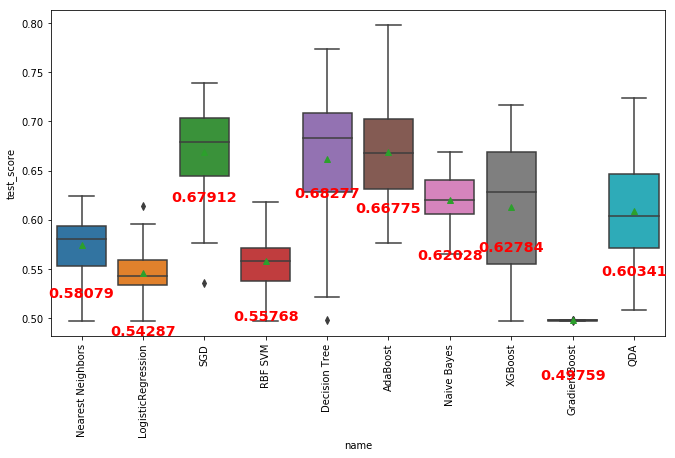

In [23]:
df = pd.DataFrame.from_dict(cv_scores)
_, ax = plt.subplots(figsize=(11, 6))
ax1 = sns.boxplot(x="name", y="test_score", data=df, order=order,ax=ax, showmeans=True)
_, xtext = plt.xticks()
for t in xtext:
    t.set_rotation("vertical")
    
medians = df.groupby(['name'],sort=False)['test_score'].median().values
median_labels = [str(np.round(s, 5)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax1.text(pos[tick], medians[tick]-0.06, median_labels[tick], 
            horizontalalignment='center', size='x-large', color='red', weight='semibold')

In [51]:
import statistics as sta
# Multi Voting Ensemble
model1 = SGDClassifier(loss='modified_huber',penalty='none', alpha=0.01)
model2 = DecisionTreeClassifier(max_depth=5, min_samples_split=70)
model3 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model4 = GaussianNB()
model5 = xgb.XGBClassifier(random_state=1,learning_rate=0.01, subsample= 0.8, 
                  colsample_bytree= 1.0, max_depth= 3, gamma=0.5, min_child_weight= 10)
model6 = QuadraticDiscriminantAnalysis()
model7 = KNeighborsClassifier(2)

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
model6.fit(X_train,y_train)
model7.fit(X_train,y_train)

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)
pred7 = model7.predict(X_test)

#pred1[i], pred2[i], pred3[i], pred4[i], pred5[i], pred6[i], pred7[i]
y_pred = np.array([])
for i in range(0,len(X_test)):
    y_pred = np.append(y_pred, sta.mode([pred1[i], pred2[i], pred3[i]]))
    
score = f1_score(y_test, y_pred, average='macro')
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.627813213779663
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4851
         1.0       0.41      0.19      0.26        47

   micro avg       0.99      0.99      0.99      4898
   macro avg       0.70      0.59      0.63      4898
weighted avg       0.99      0.99      0.99      4898

[[4838   13]
 [  38    9]]


In [ ]:
# 2. Cross Validation Tuning
#https://www.kaggle.com/dansbecker/cross-validation
#https://www.pythonforengineers.com/cross-validation-and-model-selection/
#https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [ ]:
# 3. Model Ensemble
# https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/
# https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

## Under Sample

In [52]:
h = .02  # step size in the mesh
maxiteration = 1

names = ["Nearest Neighbors", 
         "Linear SVM", 
         "RBF SVM", 
         "Gaussian Process",
         "Decision Tree", 
         "Random Forest", 
         "Neural Net", 
         "AdaBoost",
         "Naive Bayes", 
         "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


datasets = [[data1[col], data1[u"执行反吹左侧"]]]

figure = plt.figure(figsize=(27, 5))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    #X = StandardScaler().fit_transform(X)

    cv_scores = {"name": [], "test_score": []}
    order = []
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):

        print(name)
        order.append(name)
        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        for j in range(maxiteration):
            print(j)
            
            X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.2)
            
            # concatenate our training data back together
            X_t = pd.concat([X_train, y_train], axis=1)

            # separate minority and majority classes
            not_fraud = X_t[X_t[u"执行反吹左侧"]==0]
            fraud = X_t[X_t[u"执行反吹左侧"]==1]
            
            # upsample minority
            not_fraud_undersampled = resample(not_fraud,
                                      replace=False, # sample with replacement
                                      n_samples=len(fraud), # match number in majority class
                                      random_state=27) # reproducible results

            # combine majority and upsampled minority
            undersampled = pd.concat([not_fraud_undersampled, fraud])
            
            y_train = undersampled[u"执行反吹左侧"]
            X_train = undersampled.drop(u'执行反吹左侧', axis=1)
            
            X_train = StandardScaler().fit_transform(X_train)
            
            
            clf.fit(X_train, y_train)
            #score = clf.score(X_test, y_test)
            
            X_test = StandardScaler().fit_transform(X_test)
            y_pred = clf.predict(X_test)
            score = f1_score(y_test, y_pred, average='macro')
            print(classification_report(y_test, y_pred))
            print(confusion_matrix(y_test, y_pred))
            cv_scores["name"].append(name)
            cv_scores["test_score"].append(score)

Nearest Neighbors
0
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83      3213
         1.0       0.05      0.87      0.09        52

   micro avg       0.71      0.71      0.71      3265
   macro avg       0.52      0.79      0.46      3265
weighted avg       0.98      0.71      0.82      3265

[[2288  925]
 [   7   45]]
Linear SVM
0
              precision    recall  f1-score   support

         0.0       1.00      0.52      0.68      3213
         1.0       0.03      0.98      0.06        52

   micro avg       0.52      0.52      0.52      3265
   macro avg       0.52      0.75      0.37      3265
weighted avg       0.98      0.52      0.67      3265

[[1663 1550]
 [   1   51]]
RBF SVM
0


/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to 

              precision    recall  f1-score   support

         0.0       0.98      0.73      0.84      3211
         1.0       0.02      0.30      0.03        54

   micro avg       0.72      0.72      0.72      3265
   macro avg       0.50      0.51      0.43      3265
weighted avg       0.97      0.72      0.82      3265

[[2329  882]
 [  38   16]]
Gaussian Process
0


/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to 

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77      3209
         1.0       0.04      1.00      0.08        56

   micro avg       0.63      0.63      0.63      3265
   macro avg       0.52      0.81      0.43      3265
weighted avg       0.98      0.63      0.76      3265

[[1999 1210]
 [   0   56]]
Decision Tree
0
              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81      3216
         1.0       0.04      0.98      0.08        49

   micro avg       0.68      0.68      0.68      3265
   macro avg       0.52      0.83      0.45      3265
weighted avg       0.99      0.68      0.80      3265

[[2181 1035]
 [   1   48]]
Random Forest
0
              precision    recall  f1-score   support

         0.0       1.00      0.69      0.81      3216
         1.0       0.05      1.00      0.09        49

   micro avg       0.69      0.69      0.69      3265
   macro avg       0.52      0.84      0.4

/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to 

              precision    recall  f1-score   support

         0.0       1.00      0.56      0.72      3213
         1.0       0.04      1.00      0.07        52

   micro avg       0.57      0.57      0.57      3265
   macro avg       0.52      0.78      0.39      3265
weighted avg       0.98      0.57      0.71      3265

[[1809 1404]
 [   0   52]]
AdaBoost
0
              precision    recall  f1-score   support

         0.0       1.00      0.64      0.78      3215
         1.0       0.04      1.00      0.08        50

   micro avg       0.65      0.65      0.65      3265
   macro avg       0.52      0.82      0.43      3265
weighted avg       0.99      0.65      0.77      3265

[[2057 1158]
 [   0   50]]
Naive Bayes
0
              precision    recall  f1-score   support

         0.0       1.00      0.54      0.70      3212
         1.0       0.03      0.94      0.06        53

   micro avg       0.54      0.54      0.54      3265
   macro avg       0.52      0.74      0.38      

/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packag

<Figure size 1944x360 with 0 Axes>

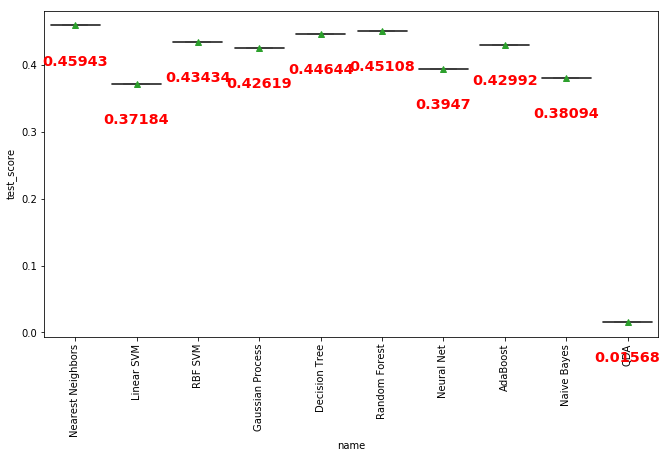

In [53]:
df = pd.DataFrame.from_dict(cv_scores)
_, ax = plt.subplots(figsize=(11, 6))
ax1 = sns.boxplot(x="name", y="test_score", data=df, order=order,ax=ax, showmeans=True)
_, xtext = plt.xticks()
for t in xtext:
    t.set_rotation("vertical")
    
medians = df.groupby(['name'],sort=False)['test_score'].median().values
median_labels = [str(np.round(s, 5)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax1.text(pos[tick], medians[tick]-0.06, median_labels[tick], 
            horizontalalignment='center', size='x-large', color='red', weight='semibold')

In [54]:
import statistics as sta
# Multi Voting Ensemble
model1 = SGDClassifier(loss='modified_huber',penalty='none', alpha=0.01)
model2 = DecisionTreeClassifier(max_depth=5, min_samples_split=70)
model3 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model4 = GaussianNB()
model5 = xgb.XGBClassifier(random_state=1,learning_rate=0.01, subsample= 0.8, 
                  colsample_bytree= 1.0, max_depth= 3, gamma=0.5, min_child_weight= 10)
model6 = QuadraticDiscriminantAnalysis()
model7 = KNeighborsClassifier(2)

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
model6.fit(X_train,y_train)
model7.fit(X_train,y_train)

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)
pred7 = model7.predict(X_test)

y_pred = np.array([])
for i in range(0,len(X_test)):
    y_pred = np.append(y_pred, sta.mode([pred1[i], pred2[i], pred3[i], pred4[i], pred5[i]]))
    
score = f1_score(y_test, y_pred, average='macro')
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.44994755817764664
              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81      3213
         1.0       0.05      0.98      0.09        52

   micro avg       0.69      0.69      0.69      3265
   macro avg       0.52      0.83      0.45      3265
weighted avg       0.98      0.69      0.80      3265

[[2186 1027]
 [   1   51]]


## Up Sample

In [55]:
h = .02  # step size in the mesh
maxiteration = 1

names = ["Nearest Neighbors", 
         "Linear SVM", 
         "RBF SVM", 
         #"Gaussian Process",
         "Decision Tree", 
         "Random Forest", 
         "Neural Net", 
         "AdaBoost",
         "Naive Bayes", 
         "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


datasets = [[data1[col], data1[u"执行反吹左侧"]]]

figure = plt.figure(figsize=(27, 5))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    #X = StandardScaler().fit_transform(X)
    
    i += 1

    cv_scores = {"name": [], "test_score": []}
    order = []
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):

        print(name)
        order.append(name)
        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        for j in range(maxiteration):
            print(j)
            
            X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.2)
            
            # concatenate our training data back together
            X_t = pd.concat([X_train, y_train], axis=1)

            # separate minority and majority classes
            not_fraud = X_t[X_t[u"执行反吹左侧"]==0]
            fraud = X_t[X_t[u"执行反吹左侧"]==1]
            
            # upsample minority
            fraud_upsampled = resample(fraud,
                                      replace=True, # sample with replacement
                                      n_samples=len(not_fraud), # match number in majority class
                                      random_state=27) # reproducible results

            # combine majority and upsampled minority
            upsampled = pd.concat([not_fraud, fraud_upsampled])
            
            y_train = upsampled[u"执行反吹左侧"]
            X_train = upsampled.drop(u'执行反吹左侧', axis=1)
            
            X_train = StandardScaler().fit_transform(X_train)
            
            
            clf.fit(X_train, y_train)
            #score = clf.score(X_test, y_test)
            
            X_test = StandardScaler().fit_transform(X_test)
            y_pred = clf.predict(X_test)
            score = f1_score(y_test, y_pred, average='macro')
            print(classification_report(y_test, y_pred))
            print(confusion_matrix(y_test, y_pred))
            cv_scores["name"].append(name)
            cv_scores["test_score"].append(score)
            
        i += 1

Nearest Neighbors
0


/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      3204
         1.0       0.09      0.38      0.14        61

   micro avg       0.91      0.91      0.91      3265
   macro avg       0.54      0.65      0.55      3265
weighted avg       0.97      0.91      0.94      3265

[[2961  243]
 [  38   23]]
Linear SVM
0


/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


              precision    recall  f1-score   support

         0.0       1.00      0.58      0.73      3214
         1.0       0.04      1.00      0.07        51

   micro avg       0.58      0.58      0.58      3265
   macro avg       0.52      0.79      0.40      3265
weighted avg       0.98      0.58      0.72      3265

[[1854 1360]
 [   0   51]]
RBF SVM
0


/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      3200
         1.0       0.01      0.05      0.02        65

   micro avg       0.90      0.90      0.90      3265
   macro avg       0.49      0.48      0.48      3265
weighted avg       0.96      0.90      0.93      3265

[[2921  279]
 [  62    3]]
Decision Tree
0
              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82      3205
         1.0       0.06      0.97      0.11        60

   micro avg       0.70      0.70      0.70      3265
   macro avg       0.53      0.83      0.46      3265
weighted avg       0.98      0.70      0.81      3265

[[2230  975]
 [   2   58]]
Random Forest
0
              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82      3214
         1.0       0.05      0.92      0.09        51

   micro avg       0.70      0.70      0.70      3265
   macro avg       0.52      0.81      0.4

/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to 

              precision    recall  f1-score   support

         0.0       1.00      0.64      0.78      3207
         1.0       0.05      0.95      0.09        58

   micro avg       0.65      0.65      0.65      3265
   macro avg       0.52      0.80      0.44      3265
weighted avg       0.98      0.65      0.77      3265

[[2064 1143]
 [   3   55]]
AdaBoost
0
              precision    recall  f1-score   support

         0.0       0.99      0.75      0.85      3217
         1.0       0.03      0.44      0.05        48

   micro avg       0.75      0.75      0.75      3265
   macro avg       0.51      0.59      0.45      3265
weighted avg       0.97      0.75      0.84      3265

[[2420  797]
 [  27   21]]
Naive Bayes
0
              precision    recall  f1-score   support

         0.0       1.00      0.54      0.70      3213
         1.0       0.03      0.94      0.06        52

   micro avg       0.54      0.54      0.54      3265
   macro avg       0.52      0.74      0.38      

/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to 

<Figure size 1944x360 with 0 Axes>

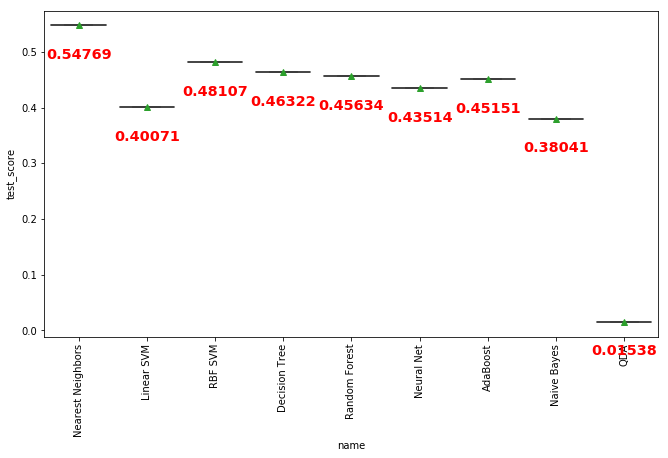

In [56]:
df = pd.DataFrame.from_dict(cv_scores)
_, ax = plt.subplots(figsize=(11, 6))
ax1 = sns.boxplot(x="name", y="test_score", data=df, order=order,ax=ax, showmeans=True)
_, xtext = plt.xticks()
for t in xtext:
    t.set_rotation("vertical")
    
medians = df.groupby(['name'],sort=False)['test_score'].median().values
median_labels = [str(np.round(s, 5)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax1.text(pos[tick], medians[tick]-0.06, median_labels[tick], 
            horizontalalignment='center', size='x-large', color='red', weight='semibold')

In [57]:
import statistics as sta
# Multi Voting Ensemble
model1 = SGDClassifier(loss='modified_huber',penalty='none', alpha=0.01)
model2 = DecisionTreeClassifier(max_depth=5, min_samples_split=70)
model3 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model4 = GaussianNB()
model5 = xgb.XGBClassifier(random_state=1,learning_rate=0.01, subsample= 0.8, 
                  colsample_bytree= 1.0, max_depth= 3, gamma=0.5, min_child_weight= 10)
model6 = QuadraticDiscriminantAnalysis()
model7 = KNeighborsClassifier(2)

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
model6.fit(X_train,y_train)
model7.fit(X_train,y_train)

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)
pred7 = model7.predict(X_test)

y_pred = np.array([])
for i in range(0,len(X_test)):
    y_pred = np.append(y_pred, sta.mode([pred1[i], pred2[i], pred3[i], pred4[i], pred5[i]]))
    
score = f1_score(y_test, y_pred, average='macro')
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.4534095718976736
              precision    recall  f1-score   support

         0.0       1.00      0.69      0.81      3214
         1.0       0.05      1.00      0.09        51

   micro avg       0.69      0.69      0.69      3265
   macro avg       0.52      0.84      0.45      3265
weighted avg       0.99      0.69      0.80      3265

[[2209 1005]
 [   0   51]]


## Daily Test Data

In [233]:
datalist = ["AirConditionDaily/空调数据采集7.15-7.16.csv", "AirConditionDaily/空调数据采集7.16-7.17.csv",
            "AirConditionDaily/空调数据采集7.17-7.18.csv", "AirConditionDaily/空调数据采集7.18-7.19.csv",
            "AirConditionDaily/空调数据采集7.19-7.20.csv", "AirConditionDaily/空调数据采集7.20-7.21.csv",
            "AirConditionDaily/空调数据采集7.21-7.22.csv", "AirConditionDaily/空调数据采集7.22-7.23.csv",
            "AirConditionDaily/空调数据采集7.23-7.24.csv", "AirConditionDaily/空调数据采集7.24-7.25.csv",
            "AirConditionDaily/空调数据采集7.25-7.26.csv", "AirConditionDaily/空调数据采集7.26-7.27.csv",
            "AirConditionDaily/空调数据采集7.27-7.28.csv", "AirConditionDaily/空调数据采集7.28-7.29.csv",
            "AirConditionDaily/空调数据采集7.29-7.30.csv", "AirConditionDaily/空调数据采集7.30-7.31.csv",
            "AirConditionDaily/空调数据采集7.31-8.1.csv", "AirConditionDaily/空调数据采集8.3-8.4.csv"]

data_train = []
index = 1

for file_ in datalist:
    temp = pd.read_csv(file_, encoding = "GB18030")
    #if len(temp.columns)>17:
    #    temp.drop(u'更换散热器左侧', axis=1, inplace=True)
    #    temp.drop(u'更换散热器右侧', axis=1, inplace=True)
    #    temp[u'换件'] = 0
    
    #if index==12:
    #    index += 1
    temp["index"] = index
    data_train.append(temp)
    index += 1

#data_train01 = pd.read_csv("AirConditionDaily/空调数据采集7.15-7.16.csv", encoding = "GB18030")
#data_train02 = pd.read_csv("AirConditionDaily/空调数据采集7.16-7.17.csv", encoding = "GB18030")
#data_train03 = pd.read_csv("AirConditionDaily/空调数据采集7.17-7.18.csv", encoding = "GB18030")
#data_train04 = pd.read_csv("AirConditionDaily/空调数据采集7.18-7.19.csv", encoding = "GB18030")
#data_train05 = pd.read_csv("AirConditionDaily/空调数据采集7.19-7.20.csv", encoding = "GB18030")

data_train_new = pd.concat(data_train)

data_train_new.drop(u'执行反吹左侧 (机器输出结果)', axis=1, inplace=True)
data_train_new.drop(u'执行反吹右侧 (机器输出结果)', axis=1, inplace=True)
data_train_new.drop(u'换件', axis=1, inplace=True)

data_train_new.loc[data_train_new[u"执行反吹左侧"]==data_train_new[u"执行反吹左侧"],u"执行反吹左侧"] = 1
data_train_new.loc[data_train_new[u"执行反吹右侧"]==data_train_new[u"执行反吹右侧"],u"执行反吹右侧"] = 1

data_train_new[u"执行反吹左侧"].fillna(0,inplace=True)
data_train_new[u"执行反吹右侧"].fillna(0,inplace=True)

data_train_new[u"左温差"] = data_train_new[u"左边L PACK"] - data_train_new[u"环境温度(℃)"]
data_train_new[u"右温差"] = data_train_new[u"右边L PACK"] - data_train_new[u"环境温度(℃)"]

In [234]:
data_train_new.drop_duplicates(subset=[u'日期', u'飞机号'], keep='first', inplace=True)
data_train_new.drop_duplicates(subset=['index', u'飞机号'], keep='first', inplace=True)

In [235]:
data_train_new

,日期,地点,飞机号,机型,环境温度(℃),左边CONT CABIN DUCT,左边L PACK,左边SUPPLY DUCT,右边FWD DUCT,右边AFT DUCT,右边L PACK,右边SUPPLY DUCT,执行反吹左侧,执行反吹右侧,index,左温差,右温差
0,2019-07-16 11:44,XNN,7399,737-800,20,4,22,0,5,4,23,0,0,0,1,2,3
1,2019-07-16 11:42,XNN,7398,737-800,18,5,23,0,4,6,23,0,0,0,1,5,5
2,2019-07-16 11:06,CTU,6800,737-800,23,3,29,0,4,3,28,0,0,0,1,6,5
3,2019-07-16 11:00,HHA,7377,737-800,28,6,34,0,7,6,30,0,0,0,1,6,2
4,2019-07-16 09:14,XIY,1483,737-800,25,4,28,0,4,4,32,0,0,0,1,3,7
5,2019-07-16 09:00,XMN,5522,737-800,22,9,36,0,8,9,37,0,1,1,1,14,15
6,2019-07-16 08:59,XMN,1497,737-800,29,9,37,0,4,3,36,0,0,0,1,8,7
7,2019-07-16 08:58,XMN,1785,737-800,30,4,30,0,8,8,32,0,0,0,1,0,2
8,2019-07-16 08:58,XMN,1141,737-800,30,4,34,0,5,5,32,0,0,0,1,4,2
9,2019-07-16 08:31,KMG,5292,737-700,20,0,0,6,0,0,0,5,0,0,1,-20,-20


In [236]:
data_train_new.columns = ['Date','Location','PlaneNo','PlaneModel','EnvTemp','LEFT CONT CABIN DUCT', 'LEFT L PACK',
                          'LEFT SUPPLY DUCT','RIGHT FWD DUCT','RIGHT AFT DUCT','RIGHT L PACK','RIGHT SUPPLY DUCT','Left Handle',
                          'Right Handle', 'index','Left Temp Diff','Right Temp Diff']

In [237]:
data_train_new_1 = data_train_new.copy()
data_train_new_1["index"] = data_train_new["index"]+1
data_train_new_2 = data_train_new.copy()
data_train_new_2["index"] = data_train_new["index"]+2

In [238]:
#data_train_new.join(data_train_new, on=['index',''], rsuffix='_other')
tmp = pd.merge(data_train_new, data_train_new_1, how='left', left_on = ['index', 'PlaneNo'], right_on = ['index','PlaneNo'],
              suffixes =['','_Today-1'])
data_train_new = pd.merge(tmp, data_train_new_2, how='left', left_on = ['index', 'PlaneNo'], right_on = ['index','PlaneNo'],
                         suffixes =['','_Today-2'])

In [239]:
#data1.drop(u'更换部件', axis=1, inplace=True)
#data1.drop(u'Fail', axis=1, inplace=True)

In [240]:
data1 = pd.concat([data_train_new])

In [241]:
data_test = data1[data1["index"]==index-1]#pd.read_csv("AirConditionDaily/空调数据采集7.22-7.23.csv", encoding = "GB18030")

In [242]:
#data_test.loc[data_test[u"执行反吹左侧"]==data_test[u"执行反吹左侧"],u"执行反吹左侧"] = 1
#data_test.loc[data_test[u"执行反吹右侧"]==data_test[u"执行反吹右侧"],u"执行反吹右侧"] = 1

In [243]:
#data_test[u"执行反吹左侧"].fillna(0,inplace=True)
#data_test[u"执行反吹右侧"].fillna(0,inplace=True)

In [244]:
#data_test[u"执行反吹左侧"].value_counts()

In [245]:
#data_test[u"执行反吹右侧"].value_counts()

In [246]:
#data_test[u"左温差"] = data_test[u"左边L PACK"] - data_test[u"环境温度(℃)"]
#data_test[u"右温差"] = data_test[u"右边L PACK"] - data_test[u"环境温度(℃)"]

In [247]:
data1 = data1[data1["index"]<index-1]

In [248]:
col = ["EnvTemp", "Left Temp Diff","LEFT CONT CABIN DUCT","LEFT L PACK", "LEFT SUPPLY DUCT", "Left Temp Diff_Today-1", 
       "Left Temp Diff_Today-2", "EnvTemp_Today-1", "EnvTemp_Today-2", "LEFT L PACK_Today-1", "LEFT L PACK_Today-2",
       "Left Handle_Today-1","Left Handle_Today-2"]

data1.dropna(inplace=True)
data_test.fillna(0, inplace=True)

X_train, y_train = data1[col], data1["Left Handle"]
X_test, y_test = data_test[col], data_test["Left Handle"]



#Under Sample
# concatenate our training data back together
X_t = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X_t[X_t["Left Handle"]==0]
fraud = X_t[X_t["Left Handle"]==1]

# upsample minority
not_fraud_undersampled = resample(not_fraud,
                          replace=False, # sample with replacement
                          n_samples=len(fraud)*10, # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
undersampled = pd.concat([not_fraud_undersampled, fraud])

y_train = undersampled["Left Handle"]
X_train = undersampled.drop('Left Handle', axis=1)


'''
# Up Sample
# concatenate our training data back together
X_t = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X_t[X_t[u"执行反吹左侧"]==0]
fraud = X_t[X_t[u"执行反吹左侧"]==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(fraud)*8, # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

y_train = upsampled[u"执行反吹左侧"]
X_train = upsampled.drop(u'执行反吹左侧', axis=1)
'''


X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [249]:
import statistics as sta
# Multi Voting Ensemble
#model1 = SGDClassifier(loss='modified_huber',penalty='none', alpha=0.01)
#model2 = DecisionTreeClassifier(max_depth=5, min_samples_split=70)
#model3 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
#model4 = GaussianNB()
#model5 = QuadraticDiscriminantAnalysis()
#model6 = xgb.XGBClassifier(random_state=1,learning_rate=0.01, subsample= 0.8, 
#                  colsample_bytree= 1.0, max_depth= 3, gamma=0.5, min_child_weight= 10)
#model7 = KNeighborsClassifier(2)

model1 = SGDClassifier(loss='squared_hinge',penalty='none', alpha=0.001)
model2 = DecisionTreeClassifier(max_depth=17, min_samples_split=10)
model3 = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model4 = GaussianNB()
model5 = QuadraticDiscriminantAnalysis()
model6 = xgb.XGBClassifier(random_state=1,learning_rate=0.01, subsample= 0.6, 
                  colsample_bytree= 1.0, max_depth= 5, gamma=1, min_child_weight= 1)
model7 = KNeighborsClassifier(2)


model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
model6.fit(X_train,y_train)
model7.fit(X_train,y_train)

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)
pred7 = model7.predict(X_test)

#pred1[i], pred2[i], pred3[i], pred4[i], pred5[i], pred6[i], pred7[i]
y_pred = np.array([])
for i in range(0,len(X_test)):
    y_pred = np.append(y_pred, sta.mode([pred1[i], pred2[i], pred3[i], pred4[i], pred5[i]]))
    
score = f1_score(y_test, y_pred, average='macro')
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8067920443782979
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       196
           1       0.55      0.75      0.63         8

   micro avg       0.97      0.97      0.97       204
   macro avg       0.77      0.86      0.81       204
weighted avg       0.97      0.97      0.97       204

[[191   5]
 [  2   6]]


/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [250]:
data_test["pred"] = y_pred
data_test.to_csv("AirConditionDaily/left20190804.csv",encoding = "GB18030")

#pd.DataFrame(y_pred).to_csv("AirConditionDaily/left20190723.csv")

In [251]:
col = ["EnvTemp", "Right Temp Diff","RIGHT FWD DUCT","RIGHT AFT DUCT","RIGHT L PACK", "RIGHT SUPPLY DUCT", 
       "EnvTemp_Today-1", "EnvTemp_Today-2", "RIGHT L PACK_Today-1", "RIGHT L PACK_Today-2", "Right Temp Diff_Today-1", 
       "Right Temp Diff_Today-2", "Right Handle_Today-1","Right Handle_Today-2"]

data1.dropna(inplace=True)
data_test.fillna(0,inplace=True)

X_train, y_train = data1[col], data1["Right Handle"]
X_test, y_test = data_test[col], data_test["Right Handle"]


# concatenate our training data back together
X_t = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X_t[X_t["Right Handle"]==0]
fraud = X_t[X_t["Right Handle"]==1]

# upsample minority
not_fraud_undersampled = resample(not_fraud,
                          replace=False, # sample with replacement
                          n_samples=len(fraud)*12, # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
undersampled = pd.concat([not_fraud_undersampled, fraud])

y_train = undersampled["Right Handle"]
X_train = undersampled.drop('Right Handle', axis=1)


X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [252]:
import statistics as sta
# Multi Voting Ensemble
#model1 = SGDClassifier(loss='modified_huber',penalty='none', alpha=0.01)
#model2 = DecisionTreeClassifier(max_depth=5, min_samples_split=70)
#model3 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
#model4 = GaussianNB()
#model5 = xgb.XGBClassifier(random_state=1,learning_rate=0.01, subsample= 0.8, 
#                  colsample_bytree= 1.0, max_depth= 3, gamma=0.5, min_child_weight= 10)
#model6 = QuadraticDiscriminantAnalysis()
#model7 = KNeighborsClassifier(2)


#Right
model1 = SGDClassifier(loss='modified_huber',penalty='none', alpha=0.0001)
model2 = DecisionTreeClassifier(max_depth=13, min_samples_split=10)
model3 = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model4 = GaussianNB()
model5 = xgb.XGBClassifier(random_state=1,learning_rate=0.01, subsample= 0.6, 
                  colsample_bytree= 1.0, max_depth= 3, gamma=5, min_child_weight= 10)
model6 = QuadraticDiscriminantAnalysis()
model7 = KNeighborsClassifier(2)


model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
model6.fit(X_train,y_train)
model7.fit(X_train,y_train)

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)
pred7 = model7.predict(X_test)

#pred1[i], pred2[i], pred3[i], pred4[i], pred5[i], pred6[i], pred7[i]
y_pred = np.array([])
for i in range(0,len(X_test)):
    y_pred = np.append(y_pred, sta.mode([pred1[i], pred2[i], pred3[i], pred4[i], pred5[i]]))
    
score = f1_score(y_test, y_pred, average='macro')
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7949748743718592
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       201
           1       0.43      1.00      0.60         3

   micro avg       0.98      0.98      0.98       204
   macro avg       0.71      0.99      0.79       204
weighted avg       0.99      0.98      0.98       204

[[197   4]
 [  0   3]]


/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [253]:
data_test["pred"] = y_pred
#pd.DataFrame(y_pred).to_csv("AirConditionDaily/right20190723.csv")
data_test.to_csv("AirConditionDaily/right20190804.csv",encoding = "GB18030")